In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plot
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('Hotel_Reservations.csv')

In [4]:
df.head(20)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


---
### Exploratory Data Analysis 

In [5]:
df.shape

(36275, 19)

##### Observation: We have too many features and few samples, taking into account the number of features.

In [6]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [8]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.booking_status.value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

67.23% of the booking are not cancelled and 32.76 % of booking are cancelled

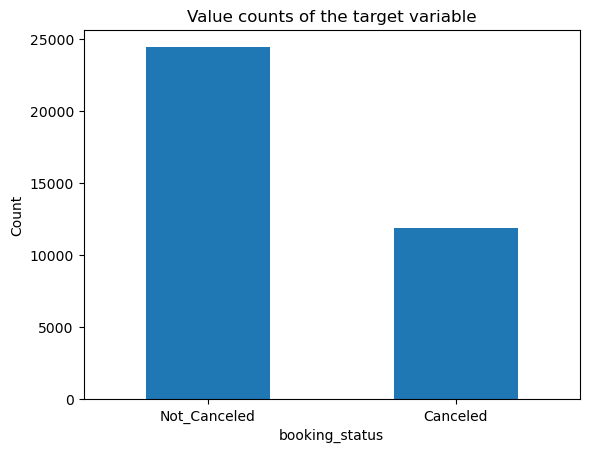

In [10]:
df.booking_status.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("booking_status")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Visualization of booking status

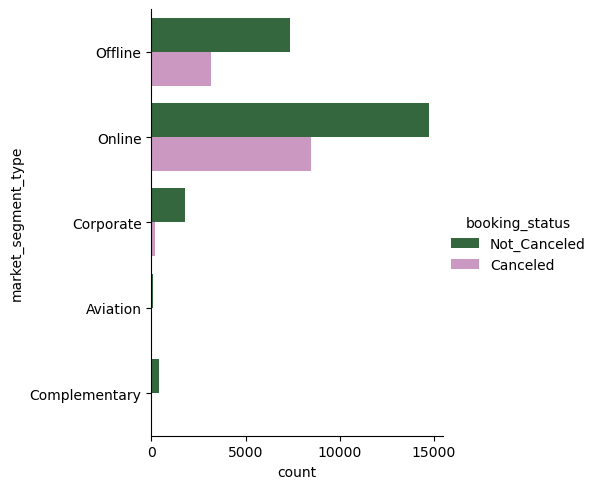

In [11]:
# Booking Status based on Market segmentation
sns.catplot(y="market_segment_type", hue="booking_status", kind="count",
            palette="cubehelix",
            data=df)

Online booking are canceled more than offline, followed by corporate market segment

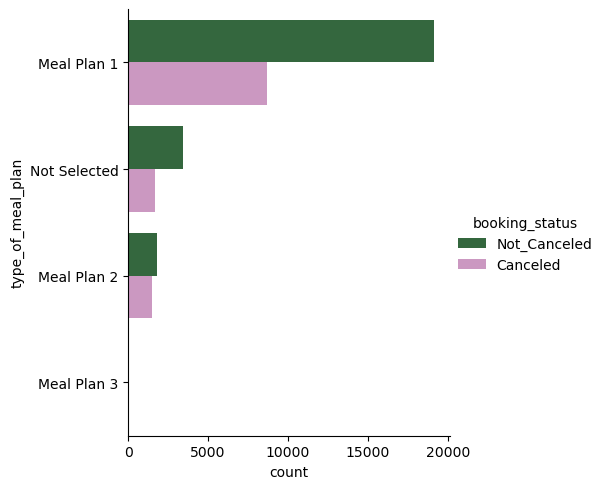

In [12]:
sns.catplot(y="type_of_meal_plan", hue="booking_status", kind="count",
            palette="cubehelix",
            data=df)

Meal Plan 1 is the most popular type of meal_plan

<AxesSubplot: xlabel='room_type_reserved', ylabel='avg_price_per_room'>

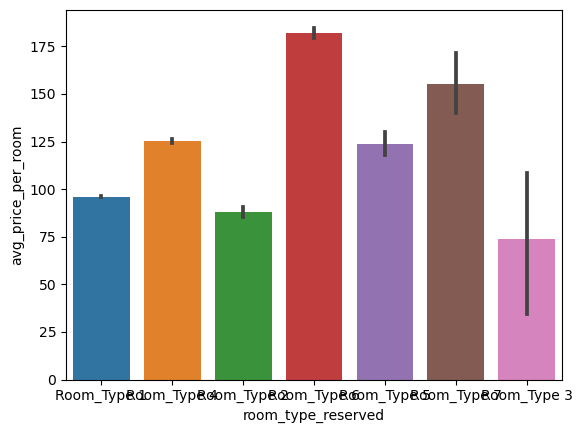

In [13]:
# Average Price per room based on room type reserved
sns.barplot(data=df, x="room_type_reserved", y="avg_price_per_room")

# Feature Selection

<AxesSubplot: >

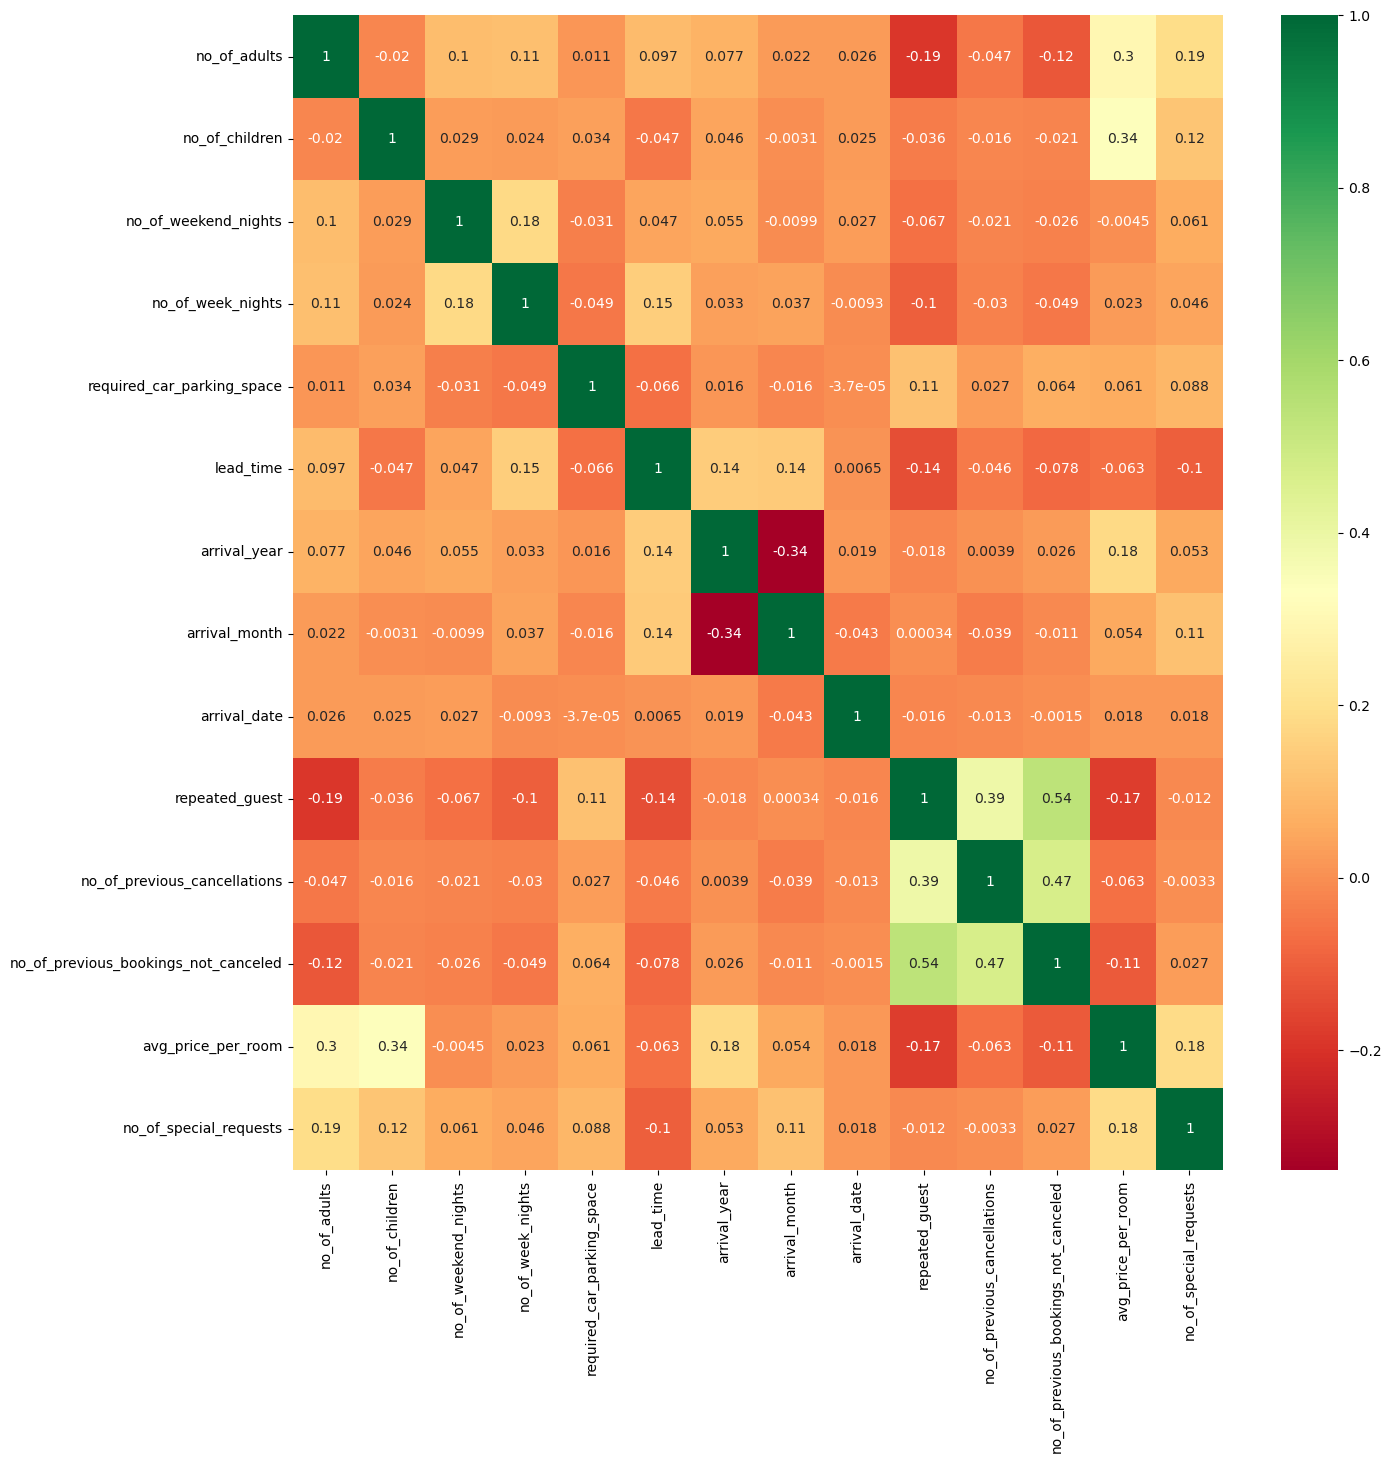

In [14]:
# Correlation among the variables
corrmat = df.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [15, 15]
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
len(df.columns)

19

In [16]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [17]:
X.shape, y.shape

((36275, 18), (36275,))

In [18]:
X.shape[1]

18

In [19]:
# Make a feature list
feature_name = X.columns.tolist()
feature_name

['Booking_ID',
 'no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
room_type = pd.get_dummies(df['room_type_reserved'])
room_type.sum()

Room_Type 1    28130
Room_Type 2      692
Room_Type 3        7
Room_Type 4     6057
Room_Type 5      265
Room_Type 6      966
Room_Type 7      158
dtype: int64

In [22]:
booking_id = pd.get_dummies(df['Booking_ID'])
booking_id.sum().head()

INN00001    1
INN00002    1
INN00003    1
INN00004    1
INN00005    1
dtype: int64

In [23]:
type_of_meal = pd.get_dummies(df['type_of_meal_plan'])
type_of_meal.sum()

Meal Plan 1     27835
Meal Plan 2      3305
Meal Plan 3         5
Not Selected     5130
dtype: int64

In [24]:
segment_type = pd.get_dummies(df['market_segment_type'])
segment_type.sum()

Aviation           125
Complementary      391
Corporate         2017
Offline          10528
Online           23214
dtype: int64

In [25]:
df_encoded = pd.get_dummies(X, columns=["type_of_meal_plan", "market_segment_type"])
df_encoded.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,0,Room_Type 1,224,2017,10,...,0,1,0,0,0,0,0,0,1,0
1,INN00002,2,0,2,3,0,Room_Type 1,5,2018,11,...,1,0,0,0,1,0,0,0,0,1
2,INN00003,1,0,2,1,0,Room_Type 1,1,2018,2,...,0,1,0,0,0,0,0,0,0,1
3,INN00004,2,0,0,2,0,Room_Type 1,211,2018,5,...,0,1,0,0,0,0,0,0,0,1
4,INN00005,2,0,1,1,0,Room_Type 1,48,2018,4,...,0,0,0,0,1,0,0,0,0,1


In [26]:
df_encoded.drop([ 'Booking_ID', 'room_type_reserved'], axis=1, inplace=True)

In [27]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
bestfeatures

SelectKBest(score_func=<function chi2 at 0x000002034ECF6AF0>)

In [28]:
topfeatures = bestfeatures.fit(df_encoded,y)
topfeatures

SelectKBest(score_func=<function chi2 at 0x000002034ECF6AF0>)

In [29]:
topfeatures.scores_

array([3.99675726e+01, 6.11192792e+01, 1.28539472e+02, 2.83301404e+02,
       2.61098182e+02, 6.04368906e+05, 8.53638611e-02, 5.81059207e+00,
       2.00729175e+01, 4.06835877e+02, 2.39758035e+02, 2.63498049e+03,
       8.77770148e+03, 2.31756329e+03, 3.16810560e+01, 2.45950121e+02,
       3.69760913e-01, 2.93971004e-01, 5.67910771e-01, 1.90530340e+02,
       4.37385080e+02, 3.78683715e+01, 1.47757163e+02])

In [30]:
dfscores = pd.DataFrame(topfeatures.scores_)
dfcolumns = pd.DataFrame(df_encoded.columns)

In [31]:
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores

,0,0
0,no_of_adults,39.967573
1,no_of_children,61.119279
2,no_of_weekend_nights,128.539472
3,no_of_week_nights,283.301404
4,required_car_parking_space,261.098182
5,lead_time,604368.906381
6,arrival_year,0.085364
7,arrival_month,5.810592
8,arrival_date,20.072918
9,repeated_guest,406.835877


In [32]:
featureScores.columns = ['Specs', 'Score']

In [33]:
featureScores

,Specs,Score
0,no_of_adults,39.967573
1,no_of_children,61.119279
2,no_of_weekend_nights,128.539472
3,no_of_week_nights,283.301404
4,required_car_parking_space,261.098182
5,lead_time,604368.906381
6,arrival_year,0.085364
7,arrival_month,5.810592
8,arrival_date,20.072918
9,repeated_guest,406.835877


In [34]:
print(featureScores.nlargest(20,'Score')) 

                                   Specs          Score
5                              lead_time  604368.906381
12                    avg_price_per_room    8777.701483
11  no_of_previous_bookings_not_canceled    2634.980493
13                no_of_special_requests    2317.563293
20         market_segment_type_Corporate     437.385080
9                         repeated_guest     406.835877
3                      no_of_week_nights     283.301404
4             required_car_parking_space     261.098182
15         type_of_meal_plan_Meal Plan 2     245.950121
10          no_of_previous_cancellations     239.758035
19     market_segment_type_Complementary     190.530340
22            market_segment_type_Online     147.757163
2                   no_of_weekend_nights     128.539472
1                         no_of_children      61.119279
0                           no_of_adults      39.967573
21           market_segment_type_Offline      37.868372
14         type_of_meal_plan_Meal Plan 1      31

---
### Training the model 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df_encoded.drop(['arrival_year'],axis=1)
y = df['booking_status']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [38]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
SGD_model = SGDClassifier()

---
### Fitting the model

In [40]:
SGD_model.fit(X_train, y_train)

SGDClassifier()

##### When fitting the model, after traning it without the followings parameters: max_iter=1000, tol=1e-3. It displayed a ValueError, and the root cause is:  
    704     warnings.warn(
    705         "Maximum number of iteration reached before "
    706         "convergence. Consider increasing max_iter to "
    707         "improve the fit.",
    708         ConvergenceWarning,
    709     )

In [41]:
SGD_predictions = SGD_model.predict(X_test)

In [42]:
confusion_matrix(y_test, SGD_predictions)

array([[2302, 1215],
       [1132, 6234]], dtype=int64)

In [43]:
accuracy_score(y_test, SGD_predictions)

0.7843425526049802

In [44]:
accuracy_score(y_test, SGD_predictions, normalize=False)

8536

##### Testing with different parameters 

In [45]:
SGD_model2 = SGDClassifier(loss='modified_huber', alpha=0.001)

In [46]:
SGD_model2.fit(X_train, y_train)

SGDClassifier(alpha=0.001, loss='modified_huber')

In [47]:
SGD_predictions2 = SGD_model2.predict(X_test)

In [48]:
confusion_matrix(y_test, SGD_predictions2)

array([[2071, 1446],
       [ 965, 6401]], dtype=int64)

In [49]:
accuracy_score(y_test, SGD_predictions2)

0.7784618211890104

In [50]:
accuracy_score(y_test, SGD_predictions2, normalize=False)

8472